## Python Project - Marvel Mart Project
## Rachel Nguyen 
## (03/12/2023)

## Part 1: Cleaning the data

In [735]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [736]:
MMsales = pd.read_csv("MM_Sales.csv")

In [737]:
MMsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       49994 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  49985 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  object 
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [738]:
sumNA = MMsales.isna().sum()
print(sumNA)

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [739]:
# Create copy of dataframe for our clean version
MMsalesClean = MMsales

In [740]:
MMsalesClean['Country'].fillna("NULL", inplace = True) 
MMsalesClean['Item Type'].fillna("NULL", inplace = True) 
MMsalesClean['Order Priority'].fillna("NULL", inplace = True) 
MMsalesClean['Order ID'].fillna(0, inplace = True) 

In [741]:
count = 0 
print("\nTesting erronous data in Country ")
for index, row in MMsalesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        MMsalesClean.loc[int(index) , 'Country'] = "NULL"
        print(MMsalesClean.loc[int(index), 'Country'])
        count+=1
    except:
        pass
    


Testing erronous data in Country 
NULL
NULL
NULL


In [742]:
print("\nTesting erronous data in Item Type")
count=0
for index, row in MMsalesClean.iterrows():
    try:
        row.loc['Item Type']=float(row.loc['Item Type']) #convert each item to float
        MMsalesCLean.loc[int(index), 'Item Type'] = "NULL"
        print(MMsalesClean.loc[int(index), 'Item Type'])
        count+=1
    except:  #if the value is string, pass it
        pass



Testing erronous data in Item Type


In [743]:
print("\nTesting erronous data in Order Priority")
count=0
for index, row in MMsalesClean.iterrows():
    try:
        row.loc['Order Priority']=float(row.loc['Order Priority']) #convert each item to float
        MMsalesCLean.loc[int(index), 'Order Priority'] = "NULL"
        print(MMsalesClean.loc[int(index), 'Order Priority'])
        count+=1
    except:  #if the value is string, pass it
        pass


Testing erronous data in Order Priority


In [744]:
print("\nTesting erronous data in earn")
count=0
for index, row in MMsalesClean.iterrows():
    try:
        #try to convert each item as a integer, if it fails, it's a string of word
        row.loc['Order ID']=int(row.loc['Order ID']) #convert to integer
    except:
        #if it's a string
        MMsalesClean.loc[int(index),'Order ID']=0 #if it's error, replace it with 0
        print(MMsalesClean.loc[int(index),'Order ID'])
        count+=1
        
print(f"Number of erronous earn {count}")


Testing erronous data in earn
0
0
0
0
0
Number of erronous earn 5


In [745]:
#create a new dataframe with NULL/0 value in the columns that we've worked with, 
#drop all data with NULL/0 value while keep data that is not NULL/0
MMsalesClean=MMsalesClean[MMsalesClean['Country']!='NULL']
MMsalesClean=MMsalesClean[MMsalesClean['Item Type']!='NULL']
MMsalesClean=MMsalesClean[MMsalesClean['Order Priority']!='NULL']
MMsalesClean=MMsalesClean[MMsalesClean['Order ID']!=0]

In [746]:
#check for any NULL or O value in the 4 columns
print(MMsalesClean['Country'][MMsalesClean['Country']=='NULL'].count()) 
print(MMsalesClean['Item Type'][MMsalesClean['Item Type']=='NULL'].count()) 
print(MMsalesClean['Order Priority'][MMsalesClean['Order Priority']=='NULL'].count()) 
print(MMsalesClean['Order ID'][MMsalesClean['Order ID']==0].count()) 

0
0
0
0


In [747]:
print(MMsalesClean.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [748]:
MMsalesClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  object 
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.7+ MB


In [749]:
 #write it to a new cvs file
MMsalesClean.to_csv("MM_Sales_clean.csv",index=False)


## Part2:Exploratory Data Analysis with Reports & Visualizations

In [750]:
newMMsales = pd.read_csv("MM_Sales_clean.csv")

In [751]:
print(newMMsales.count()) 

Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


## 1.1

Question 1.1 
"We want to know which countries we sell the most so we can pick a new location to build a shipping center. 
Rank the Top 10 countries we sell to the most to least along with the number of sales we've had with that country." 
#(note you are getting a count of the number of sale transactions here not the sum of the total sales)

In [752]:

rank=newMMsales.groupby('Country').count()[['Order ID']].nlargest(10, 'Order ID') 
print(rank)

                                  Order ID
Country                                   
Trinidad and Tobago                    321
Guinea                                 318
Cape Verde                             314
Maldives                               311
Finland                                310
Democratic Republic of the Congo       308
Samoa                                  306
Malta                                  305
China                                  303
South Sudan                            302


1.1 Use Seaborn or Matplotlib to create a chart of your choice showing these top 10 values by country.

We have shipping centers in Trinidad and Tobago, Guinea, and Maldives right now. Which country should we build a shipping center in based on most sales and lack of shipping center? When I say most sales, I'm talking about the most sales transactions, not the most sales amount. A sales transaction is represented by a row. Please justify your reasoning.

                             Country  Number of Sales
0               Trinidad and Tobago               321
1                             Guinea              318
2                         Cape Verde              314
3                           Maldives              311
4                            Finland              310
5  Democratic Republic of the Congo               308
6                              Samoa              306
7                              Malta              305
8                              China              303
9                        South Sudan              302


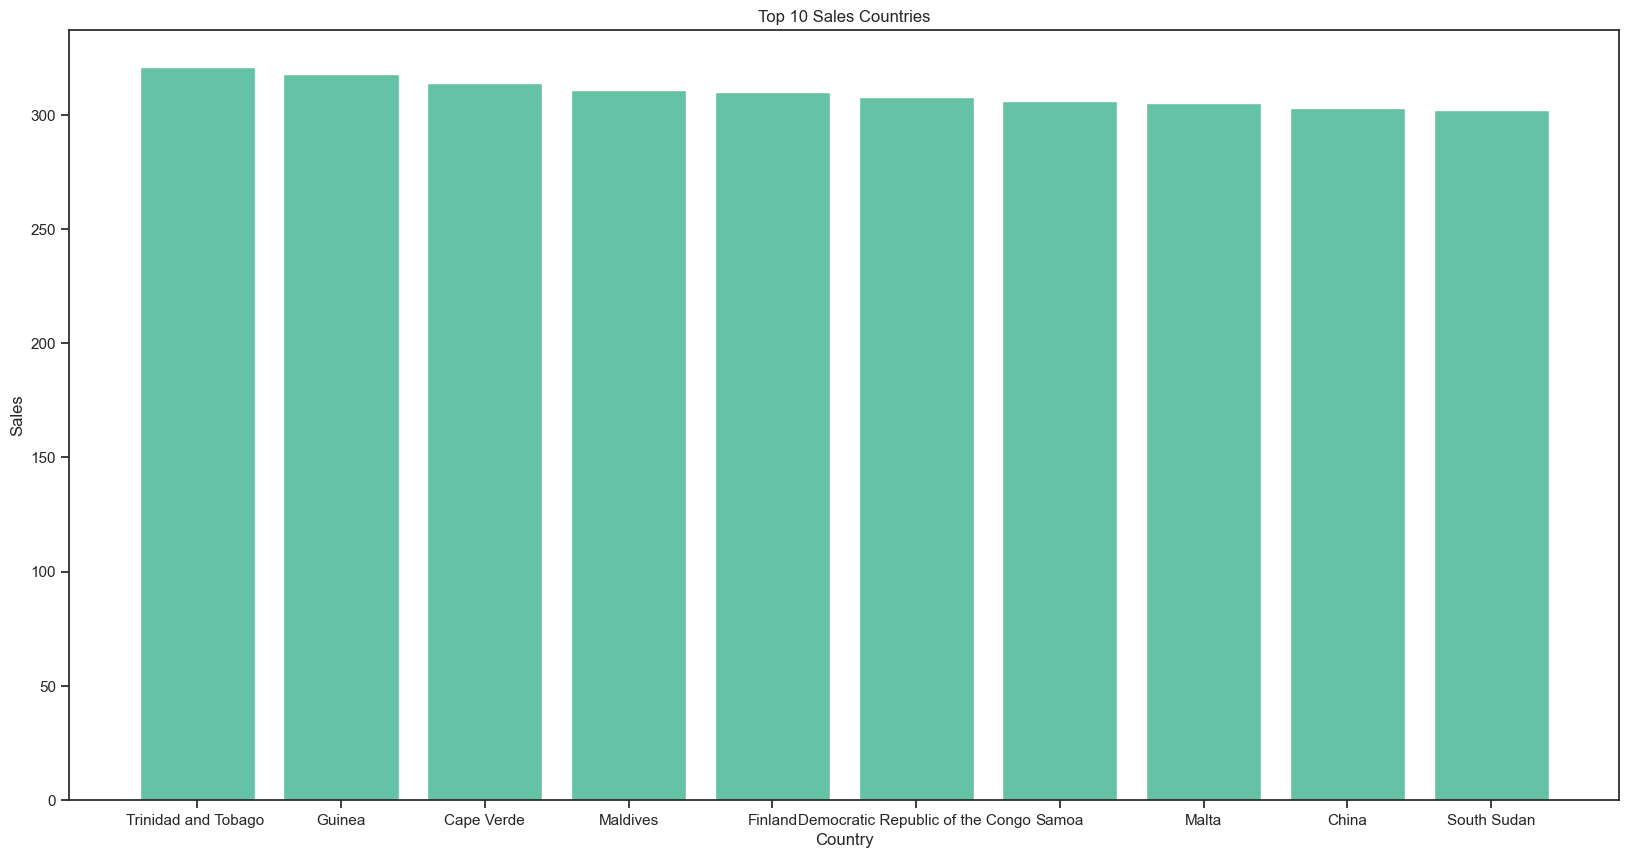

In [753]:
rank = pd.DataFrame([['Trinidad and Tobago ',321], ['Guinea',318], ['Cape Verde',314], ['Maldives',311], ['Finland',310],['Democratic Republic of the Congo ',308],['Samoa',306],['Malta',305],['China',303],['South Sudan',302]], columns=['Country', 'Number of Sales'])
print(rank)


plt.figure(figsize=(20,10))
plt.bar(x='Country', height='Number of Sales', data=rank)
plt.title('Top 10 Sales Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

1.2
Write the results to a text file called MM_Rankings.txt.
Be sure to use append so that you can append data rather than writing over top of the previous data.
Include a newline between each append to the file.
When writing to the file, please output in a text form such as: 

Countries Most Sale Transactions:
(Country Name): (number of sales transactions)
(Country Name): (number of sales transactions)
...
(Answer question) "The country we should build our shipping center is ______ because ____..."

## 1.2

In [754]:
with open("MM_Ranking.txt", "w+") as writer:
    writer.write("Countries Most Sale Transactions:")

In [755]:

with open("MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nTrinidad and Tobago:321\nGuinea:318\nCape Verde:314\nMaldives:311\nFinland:310\nDemocratic Republic of the Congo:308\nSamoa:306\nMalta:305\nChina:303\nSouth Sudan:302\n")
        writer.writelines("\nThe country we should build our shipping center is Cape Verde because Cape Verde has the third most sales, but they does not have a shipping center.\n")

"Now we will need you to determine how many online and offline orders that our company takes. Also, if you could let us know the count of the different Order Priority types, that would be great. Please show us this in a pie chart format."

Determine the count for how many online and offline orders we take.
Determine the count of the different Order Priority types.
Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).
Add the results of the sales channel types and the order priorities to the file MM_Rankings.txt.
Be sure to use append so that you can append data rather than writing over top of the previous data.
Include a newline between each append to the file.
When writing to the file, please output in a text form such as: 

Sales Channels:
Online: ####
Offline: ####
We do more online/offline sales.

Order Priorities: 
L: ###
M: ###
H: ###
C:  ###
We do more L/M/H/C order priorities.


## 2.1

In [756]:
#Determine the count for how many online and offline orders we take.
orderType = newMMsales.groupby('Sales Channel').count()[['Order ID']]
orderType


,Order ID
Sales Channel,
Offline,19788
Online,30183


## 2.2

In [757]:
#Determine the count of the different Order Priority types.
orderType=newMMsales.groupby('Order Priority').count()[['Order ID']]#sort and count order priorities by Order ID
(orderType)

,Order ID
Order Priority,
C,5012
H,15094
L,9984
M,19881


## 2.3

In [758]:
#Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).
pie = pd.DataFrame([['Offline',19788],['Online',30183]],columns=['Sales Channel', 'Number of Sales'])
print(pie)

  Sales Channel  Number of Sales
0       Offline            19788
1        Online            30183


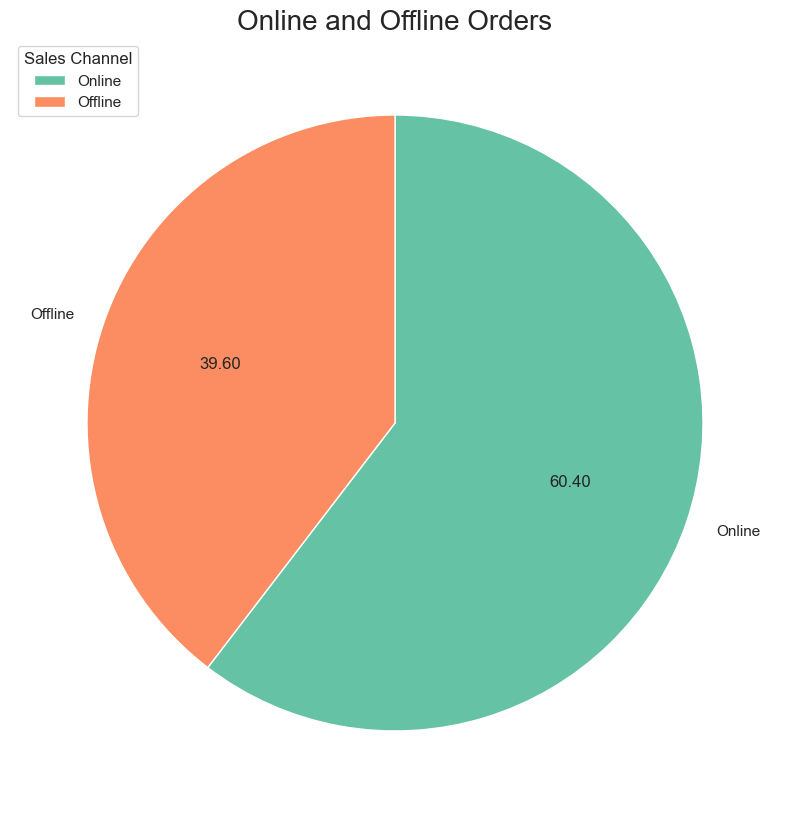

In [759]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create data
pie = pd.DataFrame([['Online', 302], ['Offline', 198]], columns=['Sales Channel', 'Number of Sales'])


# create pie chart

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.pie(pie['Number of Sales'], labels=pie['Sales Channel'], autopct='%.2f', startangle=90, counterclock=False)
plt.legend(loc=2, title='Sales Channel')
plt.title('Online and Offline Orders', fontsize=20)
plt.show()


In [760]:
#create a data frame from the Order Priority sorting result to plot
pie2=pd.DataFrame([['C',5012],['H',15094],['L',9984],['M',19881]],columns=['Order Priority', 'Number of Sales'])
print(pie2)

  Order Priority  Number of Sales
0              C             5012
1              H            15094
2              L             9984
3              M            19881


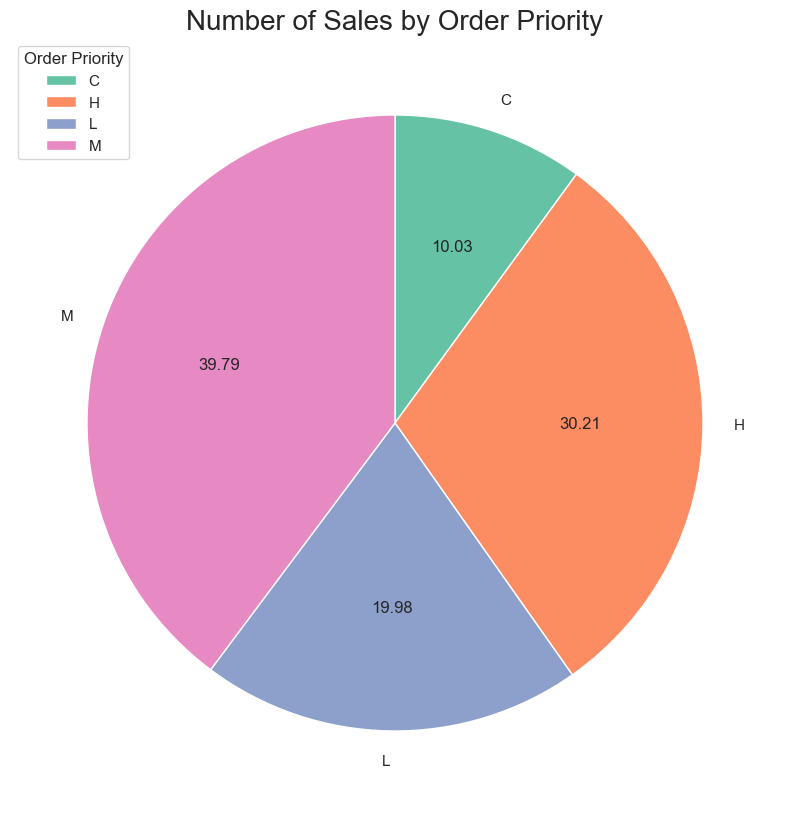

In [761]:
# create pie chart
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(pie2['Number of Sales'], labels=pie2['Order Priority'], autopct='%.2f', startangle=90, counterclock=False)
plt.legend(loc=2, title='Order Priority')
plt.title('Number of Sales by Order Priority', fontsize=20)
plt.show()

## 2.4

Add the results of the sales channel types and the order priorities to the file MM_Rankings.txt.

In [762]:
#write the result of Sales Channels to MM_Ranking
with open("MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nSales Channels:")
        writer.writelines("\nOnline:30183\nOffline:19788")
        writer.writelines("\nWe do more Online sales.")

In [763]:
##write the result of Order Priorities to MM_Ranking
with open("MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nOrder Prorities:")
        writer.writelines("\nL:9984\nM:19881\nH:15094\nC:5012")
        writer.writelines("\nWe do more M priorities.")
        

# 3.1

"For our next section, we will need you to give us an idea of how well our Item Types are producing profits for us. At the end, report to us which 3 item types are providing the most profit."

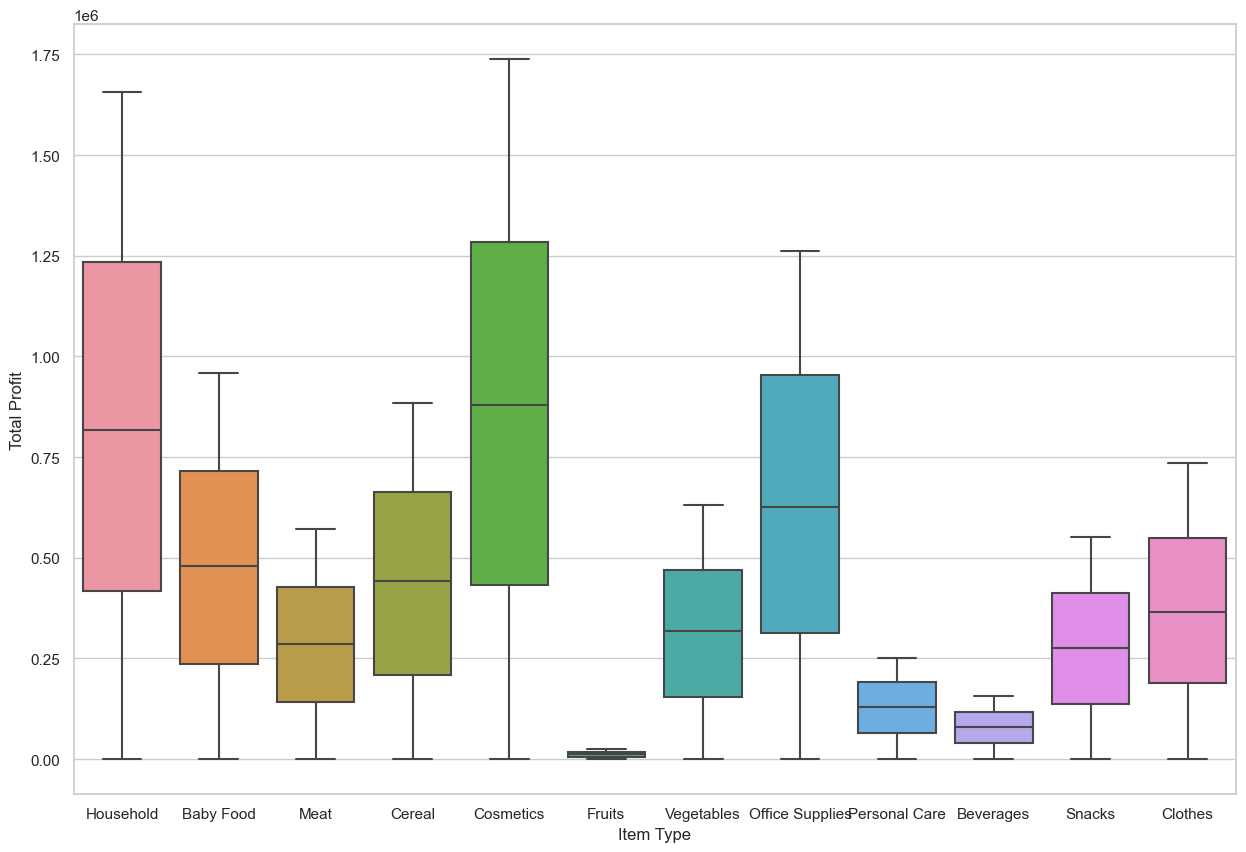

In [764]:
#Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.
plt.figure(figsize=(15,10))
ax=sns.boxplot(x="Item Type", y="Total Profit", data=newMMsales)

## 3.2

In [765]:
#Use Python to determine the sum of Total Profit by Item Type. 
Total_Profit = newMMsales.groupby('Item Type').sum()[['Total Profit']]
print(Total_Profit)

                  Total Profit
Item Type                     
Baby Food       1942865748.120
Beverages        327559249.080
Cereal          1824726412.290
Clothes         1520832019.680
Cosmetics       3638407966.750
Fruits            51010570.920
Household       3401180998.060
Meat            1196342404.400
Office Supplies 2605440187.500
Personal Care    535250525.600
Snacks          1149715758.720
Vegetables      1322639660.240


## 3.3

In [766]:
#Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.
ItemType={'Item Types':['Baby Food','Beverages','Cereal','Clothes','Cosmestics',
        'Fruits','Household','Meat','Office Supplies',
        'Personal Care','Snacks','Vegetables'],
          'Sum Of Total Profit':[1942865748.120, 327559249.080, 1824726412.290, 1520832019.680,
                3638407966.750, 51010570.920, 3401180998.060, 1196342404.400,
                2605440187.500, 535250525.600, 1149715758.720, 1322639660.240]}
## Datafrom before create pie        
ItemType=pd.DataFrame(ItemType,columns=['Item Types','Sum Of Total Profit'])
print(ItemType)

         Item Types  Sum Of Total Profit
0         Baby Food       1942865748.120
1         Beverages        327559249.080
2            Cereal       1824726412.290
3           Clothes       1520832019.680
4        Cosmestics       3638407966.750
5            Fruits         51010570.920
6         Household       3401180998.060
7              Meat       1196342404.400
8   Office Supplies       2605440187.500
9     Personal Care        535250525.600
10           Snacks       1149715758.720
11       Vegetables       1322639660.240


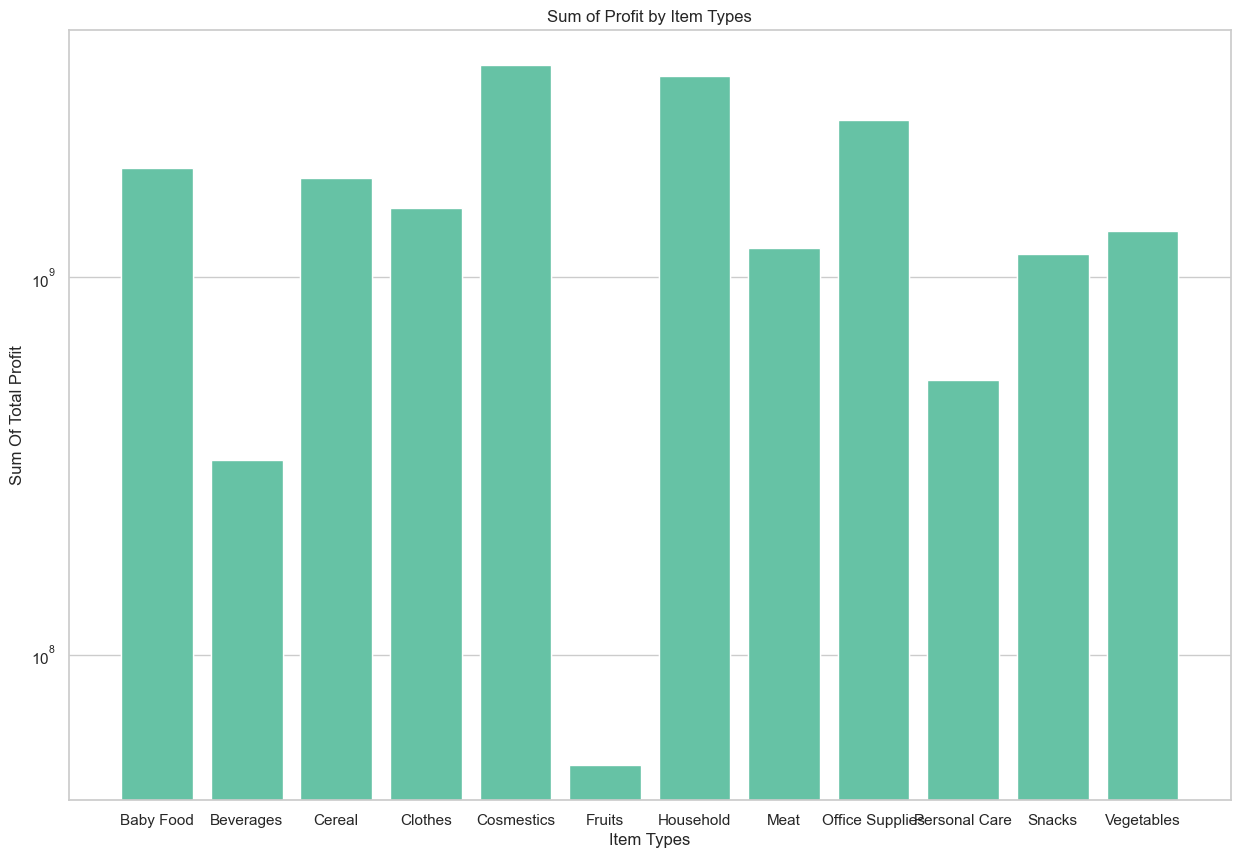

In [767]:
# Bar Graph by Seaborn way
plt.figure(figsize=(15, 10)) 
sns.barplot(data= ItemType, x='Item Types', y='Sum Of Total Profit')
plt.yscale('log')  
plt.title('Sum of Profit by Item Types') 
plt.xlabel('Item Types') 
plt.ylabel('Sum Of Total Profit') 
plt.bar(x, y) 
plt.show()

## 3.4

In [768]:
#Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. 
#(Use 'Total Profit' to determine this).  
#Please list the item types and the amount of profit made from sales

Top3 = ItemType.groupby('Item Types').sum()[['Sum Of Total Profit']].nlargest(3, 'Sum Of Total Profit') 
Rank=pd.DataFrame(Top3)
print(Rank)

                 Sum Of Total Profit
Item Types                          
Cosmestics            3638407966.750
Household             3401180998.060
Office Supplies       2605440187.500


## 3.5

Add the results of the top 3 item types to the file MM_Rankings.txt.
Be sure to use append so that you can append data rather than writing over top of the previous data.
Include a newline between each append to the file.
When writing to the file, please output in a text form such as:

In [769]:
with open("MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nHighest Selling Items:")
        writer.writelines("\nCosmestics:3638407966.750\nHousehold:3401180998.060\nOffice Supplies: 2605440187.500")
        writer.writelines("\nWe profited from Cosmetic the most.")

## 3.6

Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

In this Item Type, The cosmetics has most total profits distribution comparing to other categories. It means, the beauty industry is really potential in this business field. Fruits has lowest total profits distribution in Item Type. It could be because fruits has lower demand due to off-seasion   

## 4

"Finally, we need you to determine some descriptive statistics for us. Please determine the sum, average and maximum values for the Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit. Please put this in a report."
Produce the data above for the sum of the requested columns.
Produce the data above for the average of the requested columns. (Average Units Sold, Average Cost, etc)
Produce the data above for the maximum of the requested columns. (Max Units Sold, Max Cost, etc.)
Create two line plots using Seaborn or Matplotlib, one for the sums and one for both the averages and the maximums. DO NOT INCLUDE UNITS SOLD OR UNITS COST.
Now you will save these calculations below to a text file called MM_Calc.txt. When writing to the file, please output format such as:

Sums:
Units Sold: (Number)
Unit Cost: (Number)
Total Revenue: (Number)
Total Cost: (Number)
Total Profit: (Number)

Averages:
Units Sold: (Number)
...

Maximums:
Units Sold:
...

## 4.1 4.2 4.3

In [770]:
## 4.1
# Step 1: Calculate the sum for the requested columns
sum_df = pd.DataFrame({
    'Metric': ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
    'Value': [
        newMMsales['Units Sold'].sum(),
        newMMsales['Unit Cost'].sum(),
        newMMsales['Total Revenue'].sum(),
        newMMsales['Total Cost'].sum(),
        newMMsales['Total Profit'].sum()
    ]
})
## 4.2
# Step 2: Calculate the average for the requested columns
avg_df = pd.DataFrame({
    'Metric': ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
    'Value': [
        newMMsales['Units Sold'].mean(),
        newMMsales['Unit Cost'].mean(),
        newMMsales['Total Revenue'].mean(),
        newMMsales['Total Cost'].mean(),
        newMMsales['Total Profit'].mean()
    ]
})

## 4.3
# Step 3: Calculate the maximum values for the requested columns
max_df = pd.DataFrame({
    'Metric': ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
    'Value': [
        newMMsales['Units Sold'].max(),
        newMMsales['Unit Cost'].max(),
        newMMsales['Total Revenue'].max(),
        newMMsales['Total Cost'].max(),
        newMMsales['Total Profit'].max()
    ]
})

# Print out the results
print("Sums:")
print(sum_df.to_string(index=False))
print("\nAverages:")
print(avg_df.to_string(index=False))
print("\nMaximums:")
print(max_df.to_string(index=False))



Sums:
       Metric           Value
   Units Sold   249818150.000
    Unit Cost     9360768.320
Total Revenue 66145004417.170
   Total Cost 46629032915.810
 Total Profit 19515971501.360

Averages:
       Metric       Value
   Units Sold    4999.263
    Unit Cost     187.324
Total Revenue 1323667.816
   Total Cost  933121.869
 Total Profit  390545.947

Maximums:
       Metric       Value
   Units Sold   10000.000
    Unit Cost     524.960
Total Revenue 6682031.730
   Total Cost 5249075.040
 Total Profit 1738178.390


## 4.4

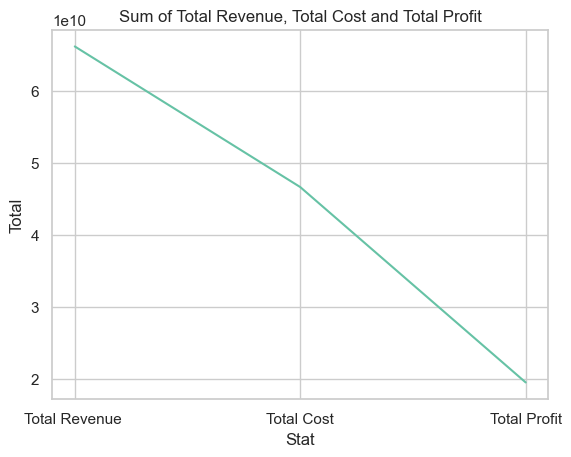

                  Average     Maximum
Total Revenue 1323667.810 6682031.730
Total Cost     933121.869 5249075.040
Total Profit   390545.947 1738178.390


Text(0.5, 1.0, 'Total of Averages VS Maximum')

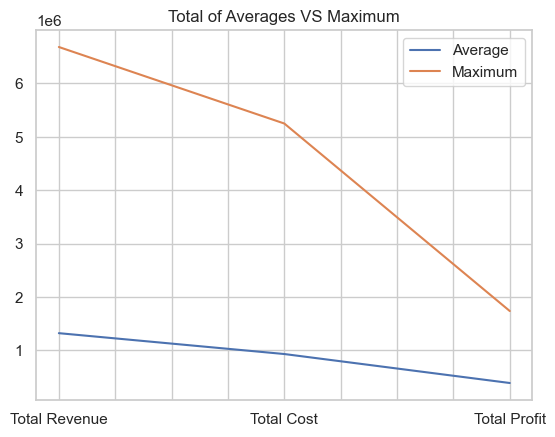

In [771]:
#4.4 Create two line plots using Seaborn or Matplotlib,
## one for the sums and one for both the averages and the maximums
#create a data frame from the SUM calculation to plot

sumvalue = pd.DataFrame([['Total Revenue ',66145004417.17],['Total Cost',46629032915.81],['Total Profit',19515971501.36]],columns=['Stat', 'Total'])
sumvalue
#create a line plot for the sum
sns.lineplot(x="Stat", y="Total", data=sumvalue)
plt.title('Sum of Total Revenue, Total Cost and Total Profit')
plt.show()


##Create two line plots (Seaborn) for the average
sns.set(style="whitegrid")
#create a data from the Average and Max calculation to plot a graph for both the averages and the maximums.

average_max = pd.DataFrame({
    'Average': [1323667.810, 933121.869, 390545.947],
    'Maximum': [6682031.73, 5249075.04, 1738178.39],
   }, index=['Total Revenue', 'Total Cost', 'Total Profit'])
print(average_max)
fig = average_max.plot.line()
plt.title('Total of Averages VS Maximum')





## 4.5

In [772]:
with open("MM_Calc.txt", "a") as writer:

          writer.write("Sums:\n")
          writer.write(sum_df.to_string(index=False) + '\n\n')
          writer.write("Averages:\n")
          writer.write(avg_df.to_string(index=False) + '\n\n')
          writer.write("Maximums:\n")
          writer.write(max_df.to_string(index=False) + '\n\n')

## PART 3

"We are in desperate need of a concise list of the Regions we sell to with the Countries that are located in each one."

For this part you will be cross-referencing the data in the CSV file and the getting an output and writing it to a new CSV file. 

Please get a list of the Regions and then the countries we sell to in that region. Please be sure no duplicates Regions or countries exist.
(Does not have to be done this way)
Non-pandas Solution advice: Please return this as a dictionary of lists with the keys of the dictionary being the name of each Region and the list attached to that being all the countries we sell to for that region. You may also return it as a Series of Lists (although I found that to be harder).
Finally, if you want to use an alternate method with pandas Dataframes, that will be accepted as well. Be sure your output is easy to read and your code makes sense.
Write this out to a CSV file called Countries_By_Region.csv.
(Be careful here as there is a header row when you convert the csv to a dictionary. If you end up getting the header row in your final result, just remove it. You are free to do it however you want as long as in the end its a dictionary of lists (or Series of Lists), the keys being the Regions and then the list for that key being the countries that is sold to, with no duplicates. And then print it to the csv file.)
Your CSV file should look like below. Order of Regions and Countries is unimportant but structure should be the same. Here are the counts for the countries by Region:

North America: 4, Europe: 48, Asia: 27, Australia & Oceania: 15, Central America & The Carribean: 20, Sub-Saharan Africa: 48, Middle East and North Africa: 23

In [773]:
RegionCountry = newMMsales.groupby(['Region'])['Country'].unique().apply(list).to_dict() 
print(RegionCountry)

{'Asia': ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal'], 'Australia and Oceania': ['Tuvalu', 'Samoa ', 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia'], 'Central America and the Caribbean': ['Antigua and Barbuda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine',

In [774]:
RegionCountry = pd.DataFrame.from_dict(RegionCountry, orient='index').transpose()
RegionCountry.to_csv("Countries_By_Region.csv",index=False)